In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from PIL import Image # 이미지를 불러오기 위한 라이브러리
import matplotlib.pyplot as plt # 그림을 표시하기 위한 라이브러리
%matplotlib inline
import warnings
import matplotlib as mpl
import seaborn as sns


### path 설정 및 데이터 확인

In [2]:
train_path = "~/input/data/train"
train_data = pd.read_csv(train_path+'/train.csv')
train_data

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20


# input 값에 대한 분석

### Null 값은 없다.

In [3]:
train_data.isnull().sum()

id        0
gender    0
race      0
age       0
path      0
dtype: int64

In [4]:
train_data

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20


### 남자 여자
여자가 더 많다.

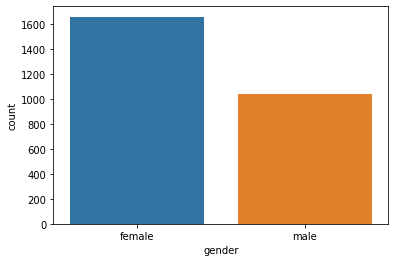

In [5]:
sns.countplot(x='gender',data = train_data)

### 나이별 
60 세 넘는 사람은 없었습니다.
-> 20살쪽과 60살쪽에 편향되어있다.

In [73]:
train_data[(train_data.age > 60)]

,id,gender,race,age,path


In [68]:
condition1 = (train_data.age < 30)
condition2 = (train_data.age >= 30) & (train_data.age < 60) 
condition3 = (train_data.age > 60) # 조건을 만족하는 사람은 없다.

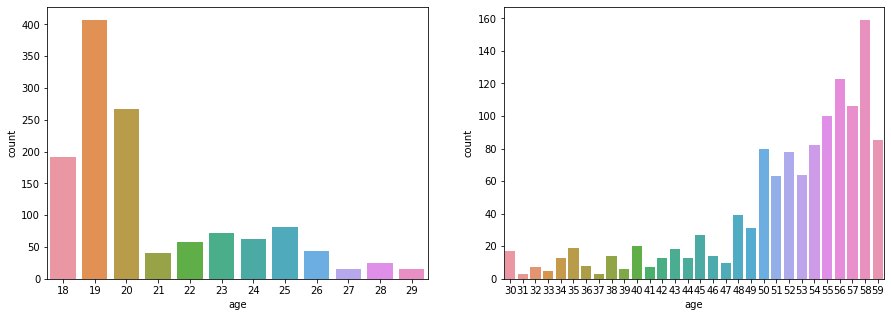

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='age',
              data = train_data[condition1],
              ax = axes[0],
              )
sns.countplot(x='age',
              data = train_data[condition2],
              ax = axes[1],
              )

### image list에 이미지 주소 저장 

In [78]:
train_file_path = train_data['path']
train_image = []
for file in train_file_path:
    train_image.append("/opt/ml/input/data/train/images/" + file + "/mask1.jpg")



### image Test
size = (384, 512) (width, height)

- mask 1 & 2 & 3 & 4 -> 색상별 마스크 랜덤.
- mask5 -> 두껍고 무늬있는 마스크
- incorrect_mask -> 잘못쓰고있는 모습
- normal -> 안끼고 있음.

(384, 512)
(384, 512)


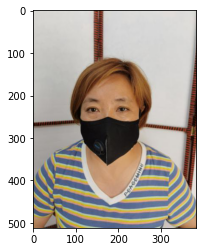

In [129]:
image0 = Image.open(train_image[0])
image1 = Image.open(train_image[1])
image0_size = image0.size
image1_size = image1.size
print(image0_size)
print(image1_size)
plt.imshow(image0)

### 이미지 자르기 정도
무조건 왼쪽, 위를 기준으로 한다.\
width  (90~ 270 까지, 왼쪽기준)\
height (100~ 380 까지, 위쪽기준)

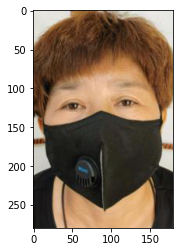

In [151]:
width, height = image1.size
left = 90
top = 100
right = 270
bottom = 380
image1_cropped = image1.crop((left,top,right,bottom))
plt.imshow(image1_cropped)

### 채널별 통계값
어떻게 해야 할까?

# 타겟 값에 대한 분석

분류 문제이다.
y값에 대한 특성
- 마스크 유무(3), 성별(2), 나이(3)
- 마스크 유무는 제대로 썻는가, 이상하게 썼는가, 안썼는가
- 나이는 30살 60살 기준으로 나눈다.


In [31]:
train_image[0]

'/opt/ml/input/data/train/images/000001_female_Asian_45/mask1.jpg'

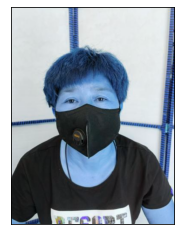

In [26]:
cv_test =[]
cv_test.append(cv2.imread(train_image[0]))
cv_test.append(cv2.imread(train_image[1]))
for i in cv_test:
    plt.imshow(i) 
plt.xticks([]) 
plt.yticks([]) 
plt.show()
